### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/DF-DM


### Setup Environment:

In [2]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion

In [3]:
PATH = 'Embeddings/mimic/'
COLUMN = 'embeddings'

num_epochs = 30

## Get data

### Merge and preprocess the datasets

In [4]:
df = pd.read_csv('Embeddings_c/mimic/embeddings.csv')
df.disease_label = df.disease_label.astype(str)
df.race_label = df.race_label.astype(str)
df.head()

,path,race_label,sex_label,disease_label,subject_id,study_id,split,file_path,text_1,text_2,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,p19/p19702416/s51321189/d85c9f15-f0f84927-761f...,0,0,3,19702416,51321189,train,datasets/mimic/files/p19/p19702416/s51321189.txt,0.019312,-0.016845,...,-1.977094,0.664772,-2.003561,0.063048,0.218469,-2.259382,-1.804749,-3.272988,1.671752,-2.163086
1,p13/p13339704/s51292704/0024603b-12db30e2-ab32...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.502330,-0.262871,-2.777717,1.082299,1.273291,-1.900938,-1.250531,-3.238538,1.466622,-3.243235
2,p13/p13339704/s51292704/7953848d-2411f0df-859f...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.352660,0.049591,-2.599992,0.709397,0.635155,-2.035155,-1.170720,-3.293882,1.306690,-2.955477
3,p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...,0,0,3,12668169,54048859,train,datasets/mimic/files/p12/p12668169/s54048859.txt,0.023151,-0.003735,...,-2.531913,0.778623,-3.406011,0.288661,1.660015,-2.785958,-1.350666,-2.999661,2.809513,-3.075176
4,p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...,0,0,3,10309415,58144222,train,datasets/mimic/files/p10/p10309415/s58144222.txt,0.022132,-0.021821,...,-1.868888,0.562119,-1.824777,0.069089,1.093687,-1.628035,-1.373444,-3.014874,1.524349,-2.403681


In [5]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
full_columns = [column for column in df.columns if 'text' in column]
midpoint = len(full_columns) // 2

# Split the list into two halves
image_columns = full_columns[:midpoint]
text_columns = full_columns[midpoint:]

Train Shape: (107695, 4872)
Test Shape: (30360, 4872)


## Disease

In [6]:
label_columns = 'disease_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [7]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))

Training Early Fusion Model:
The number of parameters of the model are: 525188
Epoch 1/30 - Test Accuracy: 0.7339, macro-f1: 0.5978, macro-AUC: 0.8342
Epoch 1/30 - Training Time: 16.32 seconds | Inference Time: 3.29 seconds
Epoch 2/30 - Test Accuracy: 0.6648, macro-f1: 0.5639, macro-AUC: 0.8262
Epoch 2/30 - Training Time: 18.77 seconds | Inference Time: 3.83 seconds
Epoch 3/30 - Test Accuracy: 0.7574, macro-f1: 0.6231, macro-AUC: 0.8506
Epoch 3/30 - Training Time: 18.56 seconds | Inference Time: 5.15 seconds
Epoch 4/30 - Test Accuracy: 0.7655, macro-f1: 0.6267, macro-AUC: 0.8509
Epoch 4/30 - Training Time: 17.71 seconds | Inference Time: 2.78 seconds
Epoch 5/30 - Test Accuracy: 0.7262, macro-f1: 0.6020, macro-AUC: 0.8457
Epoch 5/30 - Training Time: 17.21 seconds | Inference Time: 5.70 seconds
Epoch 6/30 - Test Accuracy: 0.8398, macro-f1: 0.6859, macro-AUC: 0.8251
Epoch 6/30 - Training Time: 20.44 seconds | Inference Time: 5.28 seconds
Epoch 7/30 - Test Accuracy: 0.7287, macro-f1: 0.598

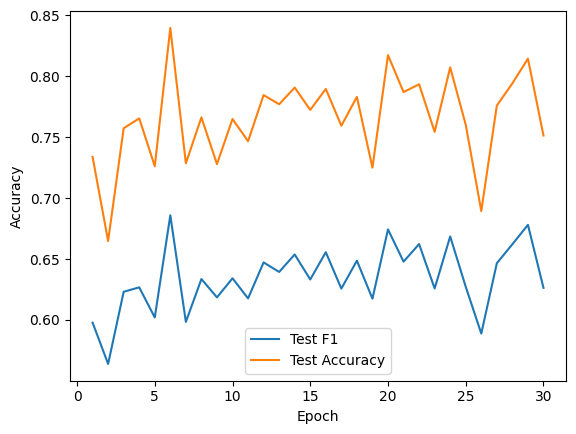

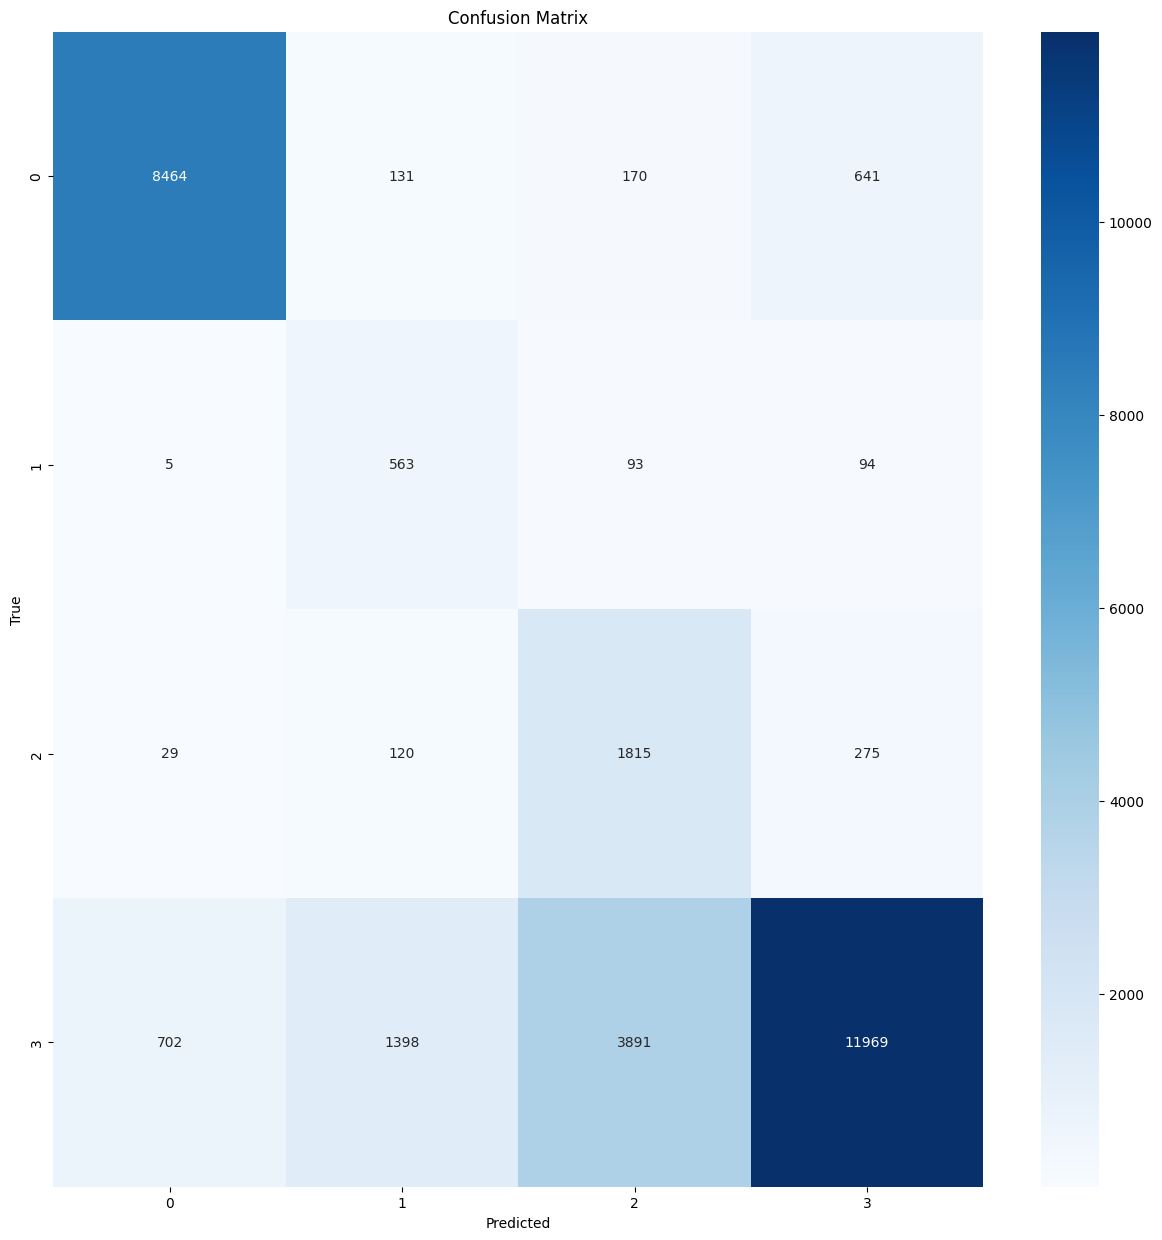

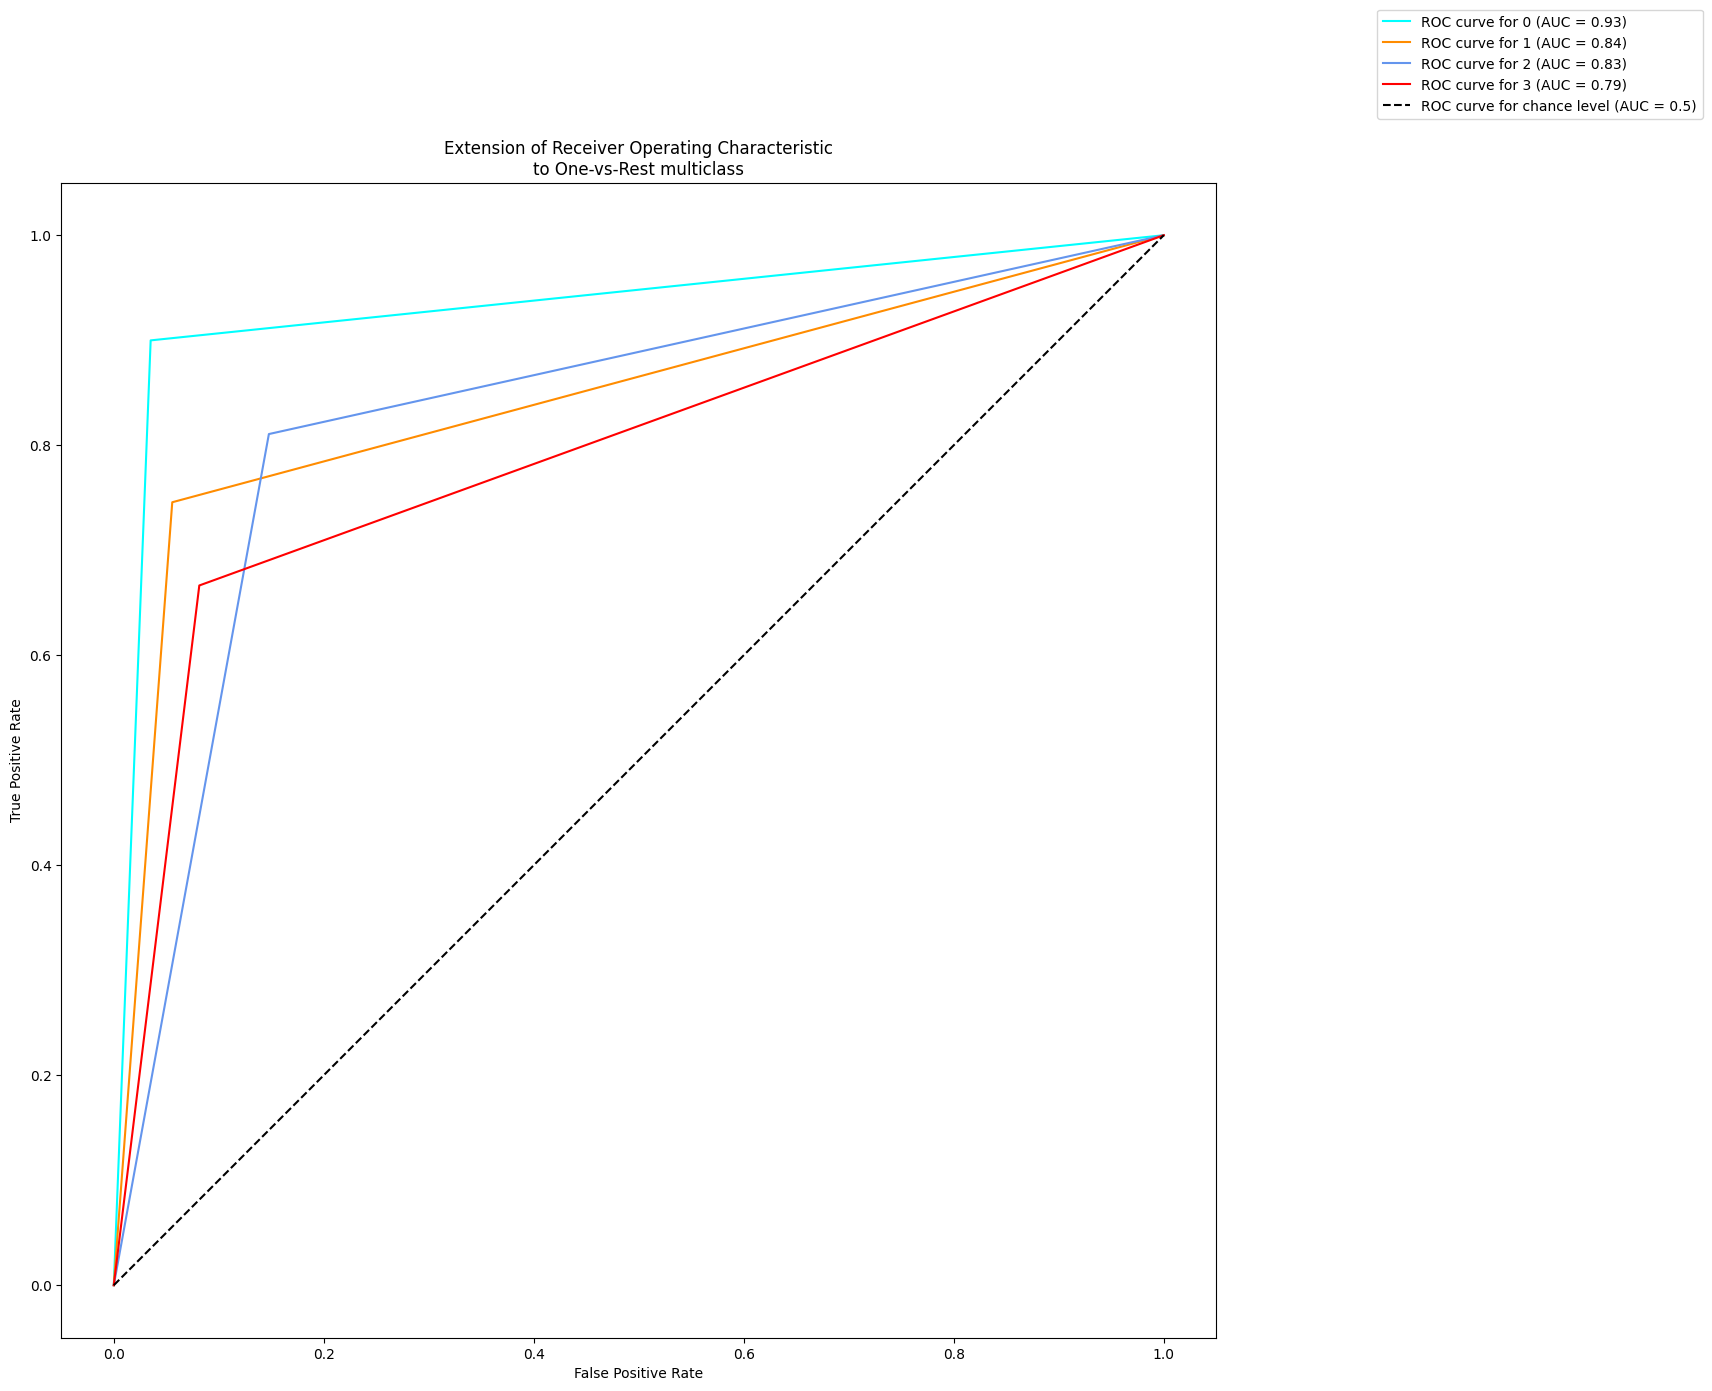

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      9406
           1       0.25      0.75      0.38       755
           2       0.30      0.81      0.44      2239
           3       0.92      0.67      0.77     17960

    accuracy                           0.75     30360
   macro avg       0.60      0.78      0.63     30360
weighted avg       0.86      0.75      0.78     30360



(0.7513504611330698,
 0.859317744361253,
 0.7513504611330698,
 0.781633073179104,
 {'Acc': {'Acc': 0.8397562582345192,
   'F1': 0.6858751765169294,
   'Auc': 0.8250595039973481,
   'Epoch': 6,
   'Auc_Per_Class': array([0.93019069, 0.76825588, 0.75341225, 0.84837919])},
  'Macro-F1': {'Acc': 0.8397562582345192,
   'F1': 0.6858751765169294,
   'Auc': 0.8250595039973481,
   'Epoch': 6,
   'Auc_Per_Class': array([0.93019069, 0.76825588, 0.75341225, 0.84837919])},
  'AUC': {'Acc': 0.7846179183135705,
   'F1': 0.6471886903560423,
   'Auc': 0.8576062797847313,
   'Epoch': 12,
   'Auc_Per_Class': array([0.93269218, 0.8684477 , 0.80962129, 0.81966395])}})

In [8]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

## Sex

Training Early Fusion Model:
The number of parameters of the model are: 524801
Epoch 1/30 - Test Accuracy: 0.7466, macro-f1: 0.7442, macro-AUC: 0.8416
Epoch 1/30 - Training Time: 20.32 seconds | Inference Time: 5.08 seconds
Epoch 2/30 - Test Accuracy: 0.7507, macro-f1: 0.7412, macro-AUC: 0.8455
Epoch 2/30 - Training Time: 16.77 seconds | Inference Time: 4.56 seconds
Epoch 3/30 - Test Accuracy: 0.7443, macro-f1: 0.7442, macro-AUC: 0.8605
Epoch 3/30 - Training Time: 16.31 seconds | Inference Time: 4.99 seconds
Epoch 4/30 - Test Accuracy: 0.7533, macro-f1: 0.7530, macro-AUC: 0.8629
Epoch 4/30 - Training Time: 17.35 seconds | Inference Time: 4.91 seconds
Epoch 5/30 - Test Accuracy: 0.7608, macro-f1: 0.7579, macro-AUC: 0.8684
Epoch 5/30 - Training Time: 15.39 seconds | Inference Time: 4.90 seconds
Epoch 6/30 - Test Accuracy: 0.7498, macro-f1: 0.7348, macro-AUC: 0.8732
Epoch 6/30 - Training Time: 18.30 seconds | Inference Time: 3.08 seconds
Epoch 7/30 - Test Accuracy: 0.7636, macro-f1: 0.761

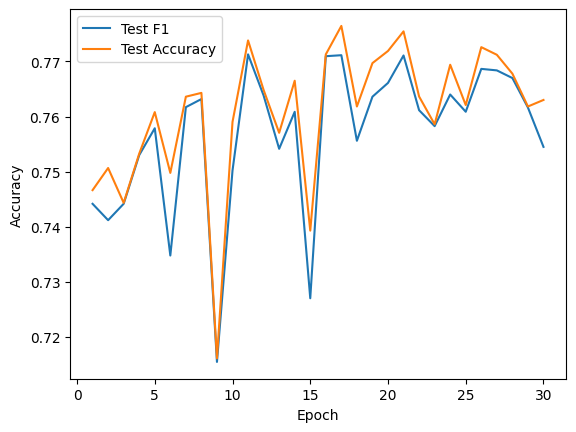

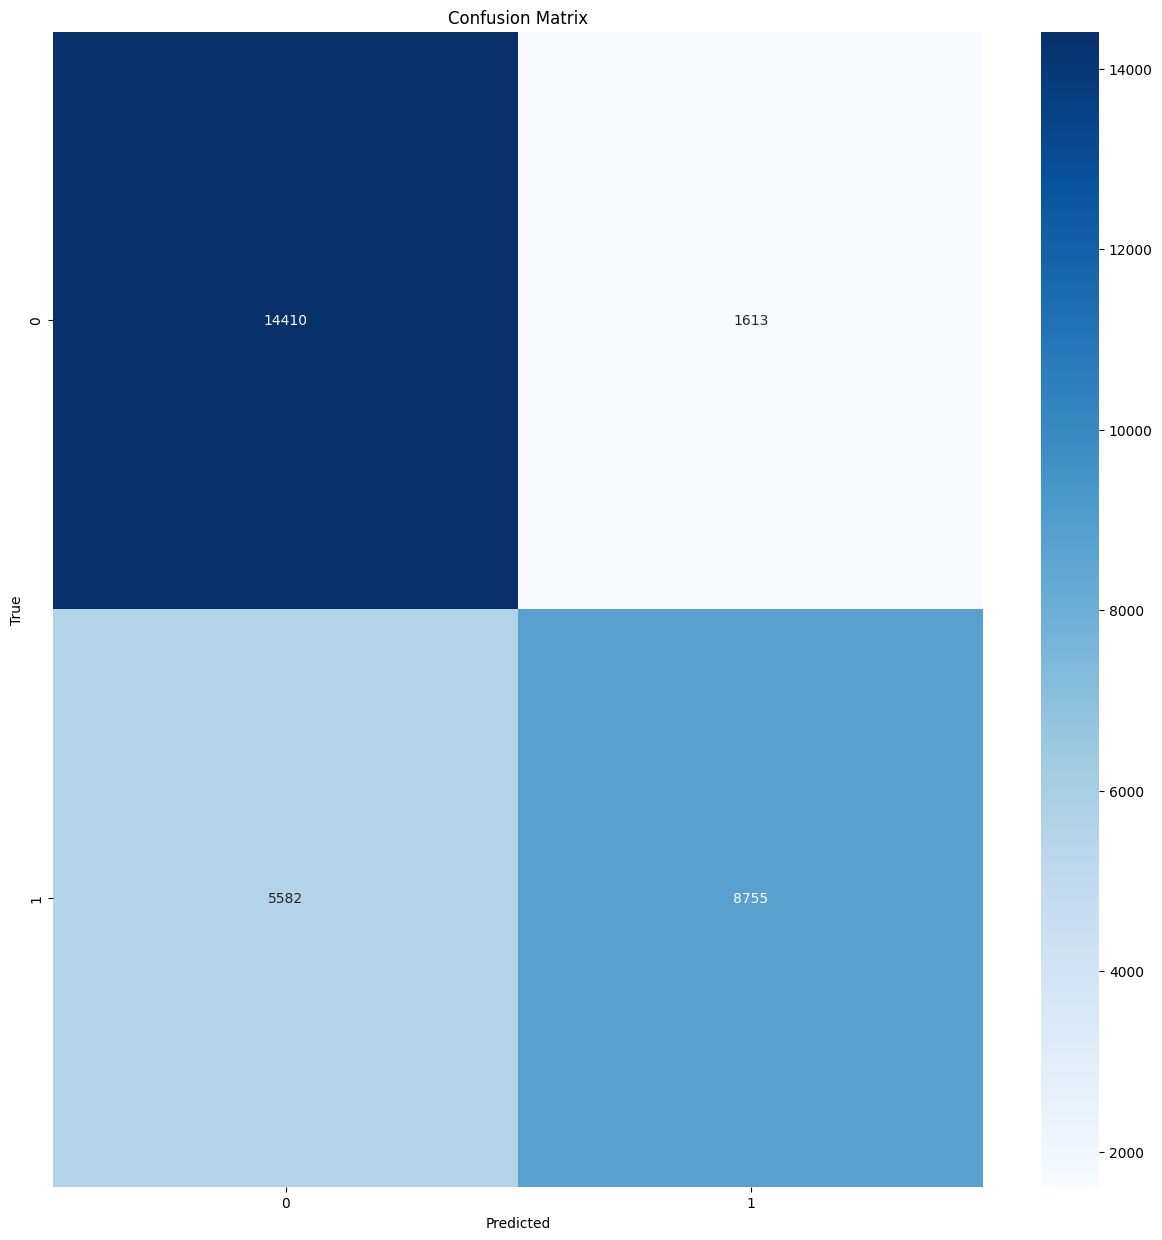

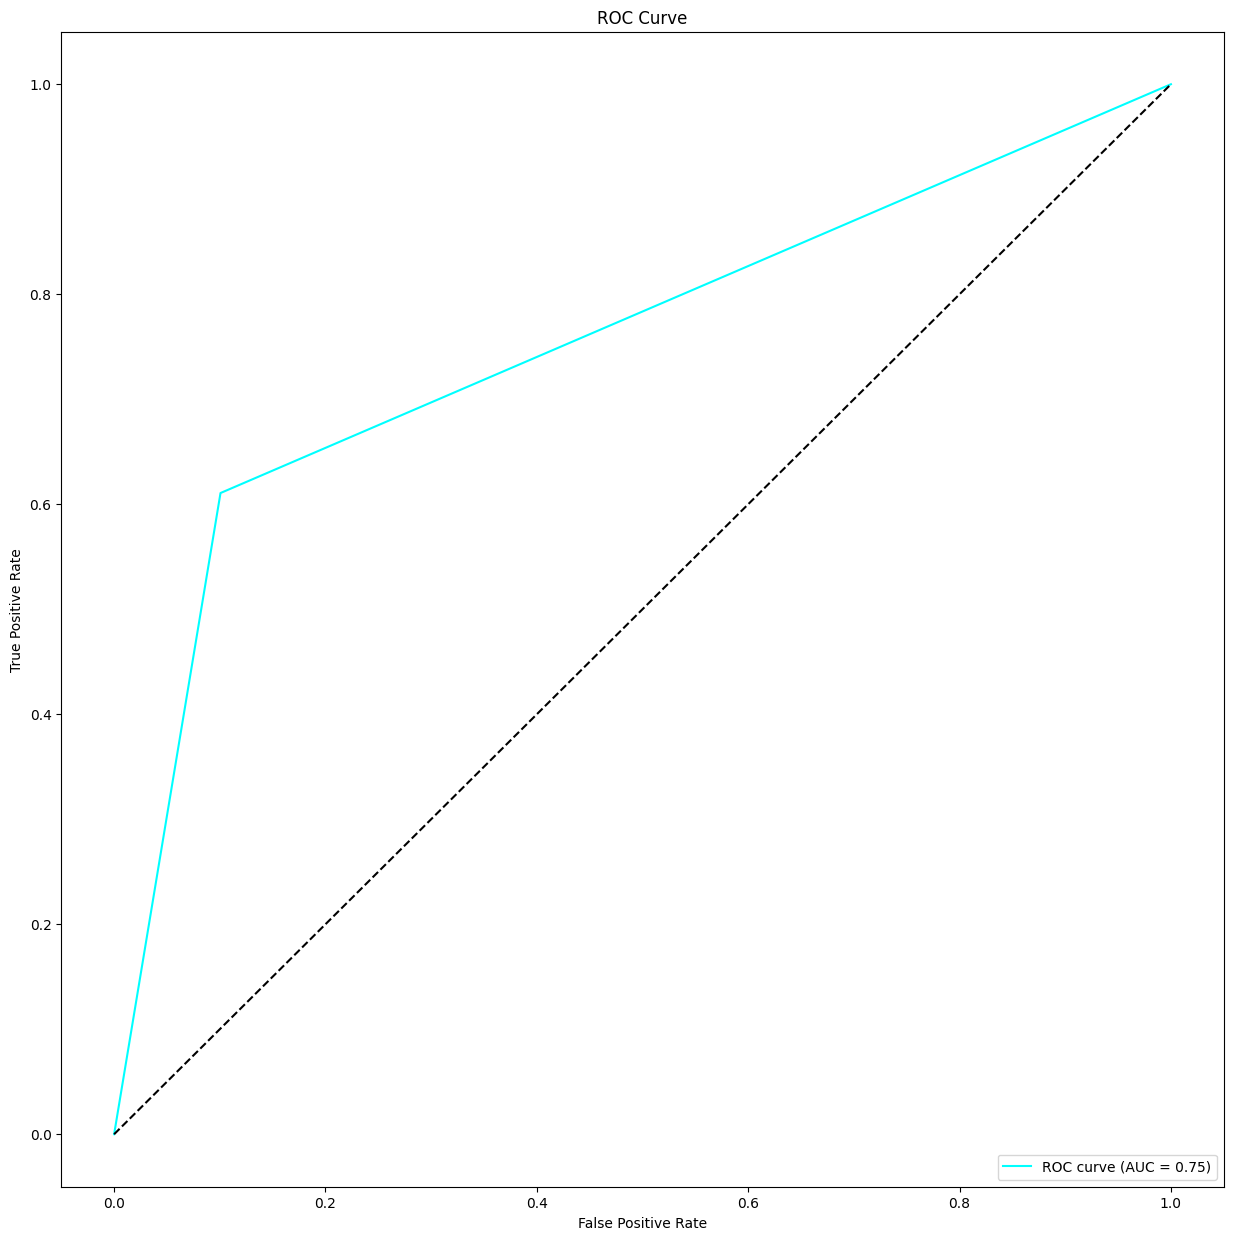

              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80     16023
         1.0       0.84      0.61      0.71     14337

    accuracy                           0.76     30360
   macro avg       0.78      0.75      0.75     30360
weighted avg       0.78      0.76      0.76     30360



(0.7630105401844532,
 0.7791737356380299,
 0.7630105401844532,
 0.7570322848247704,
 {'Acc': {'Acc': 0.7764492753623189,
   'F1': 0.7711333612450982,
   'Auc': 0.882812148249732,
   'Epoch': 17,
   'Auc_Per_Class': 0.882812148249732},
  'Macro-F1': {'Acc': 0.7738142292490119,
   'F1': 0.7712876102019692,
   'Auc': 0.8816890199483112,
   'Epoch': 11,
   'Auc_Per_Class': 0.8816890199483112},
  'AUC': {'Acc': 0.7754611330698287,
   'F1': 0.7710864570956897,
   'Auc': 0.8835528595635682,
   'Epoch': 21,
   'Auc_Per_Class': 0.8835528595635682}})

In [9]:
label_columns = 'sex_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

### Race

Training Early Fusion Model:
The number of parameters of the model are: 525059
Epoch 1/30 - Test Accuracy: 0.3927, macro-f1: 0.2830, macro-AUC: 0.5417
Epoch 1/30 - Training Time: 16.89 seconds | Inference Time: 3.92 seconds
Epoch 2/30 - Test Accuracy: 0.4937, macro-f1: 0.3343, macro-AUC: 0.5689
Epoch 2/30 - Training Time: 17.39 seconds | Inference Time: 3.34 seconds
Epoch 3/30 - Test Accuracy: 0.4366, macro-f1: 0.3146, macro-AUC: 0.5772
Epoch 3/30 - Training Time: 15.63 seconds | Inference Time: 3.86 seconds
Epoch 4/30 - Test Accuracy: 0.3490, macro-f1: 0.2753, macro-AUC: 0.5556
Epoch 4/30 - Training Time: 14.58 seconds | Inference Time: 5.71 seconds
Epoch 5/30 - Test Accuracy: 0.2681, macro-f1: 0.2184, macro-AUC: 0.5526
Epoch 5/30 - Training Time: 16.61 seconds | Inference Time: 2.92 seconds
Epoch 6/30 - Test Accuracy: 0.4617, macro-f1: 0.3182, macro-AUC: 0.5669
Epoch 6/30 - Training Time: 17.00 seconds | Inference Time: 3.30 seconds
Epoch 7/30 - Test Accuracy: 0.4071, macro-f1: 0.300

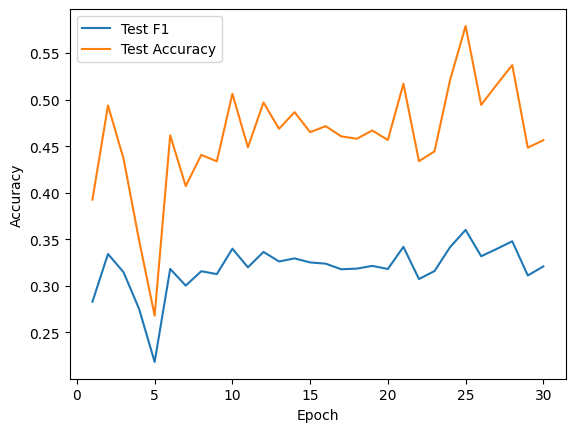

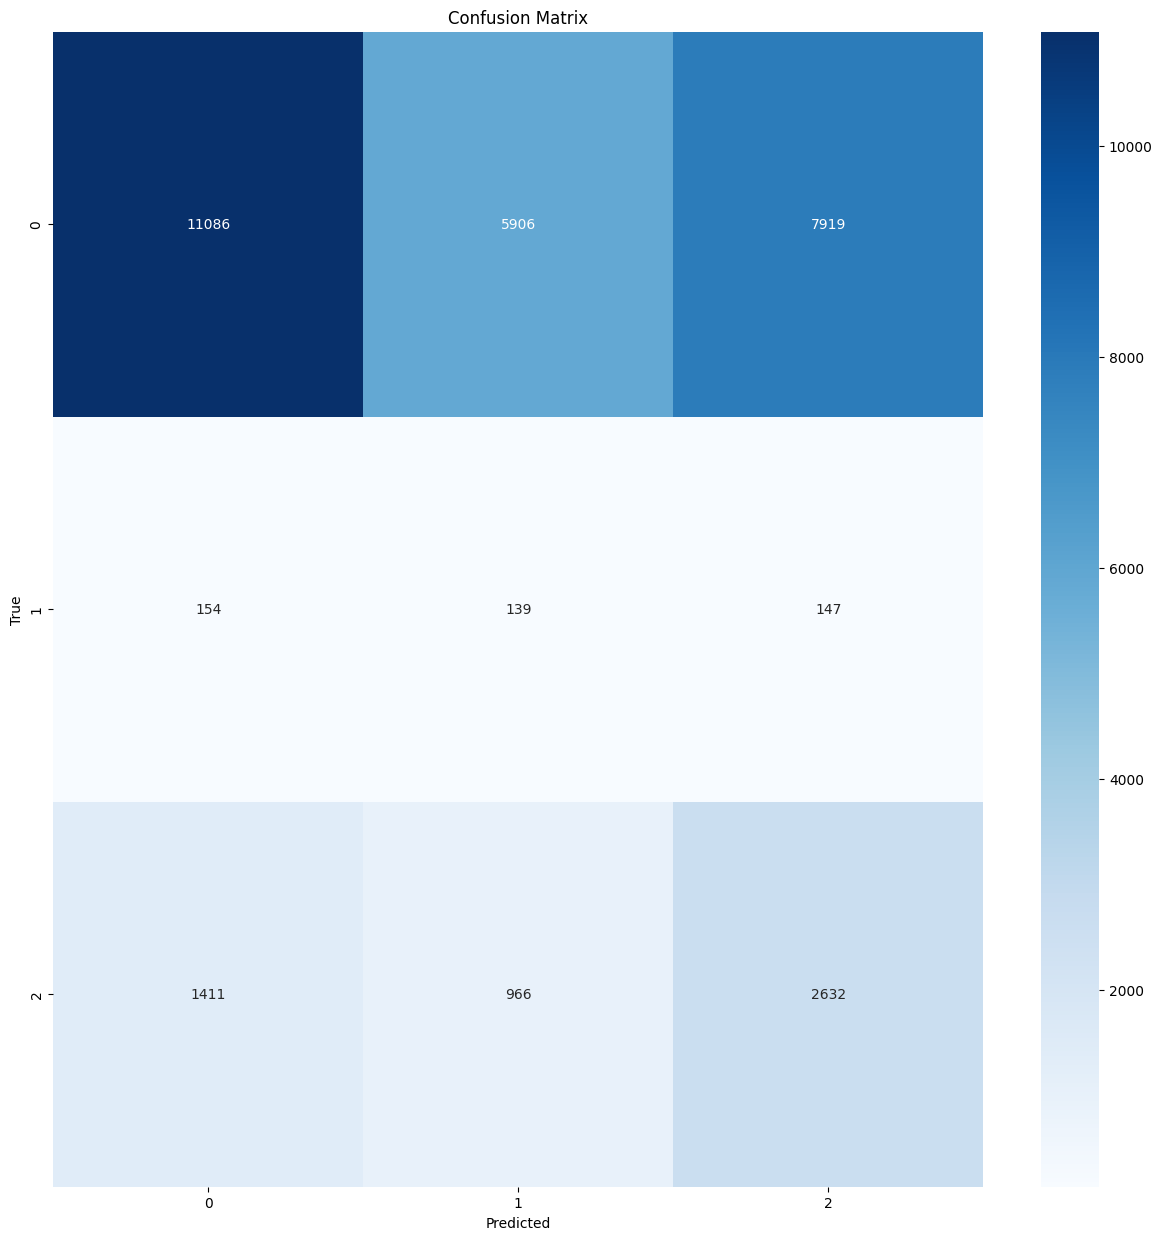

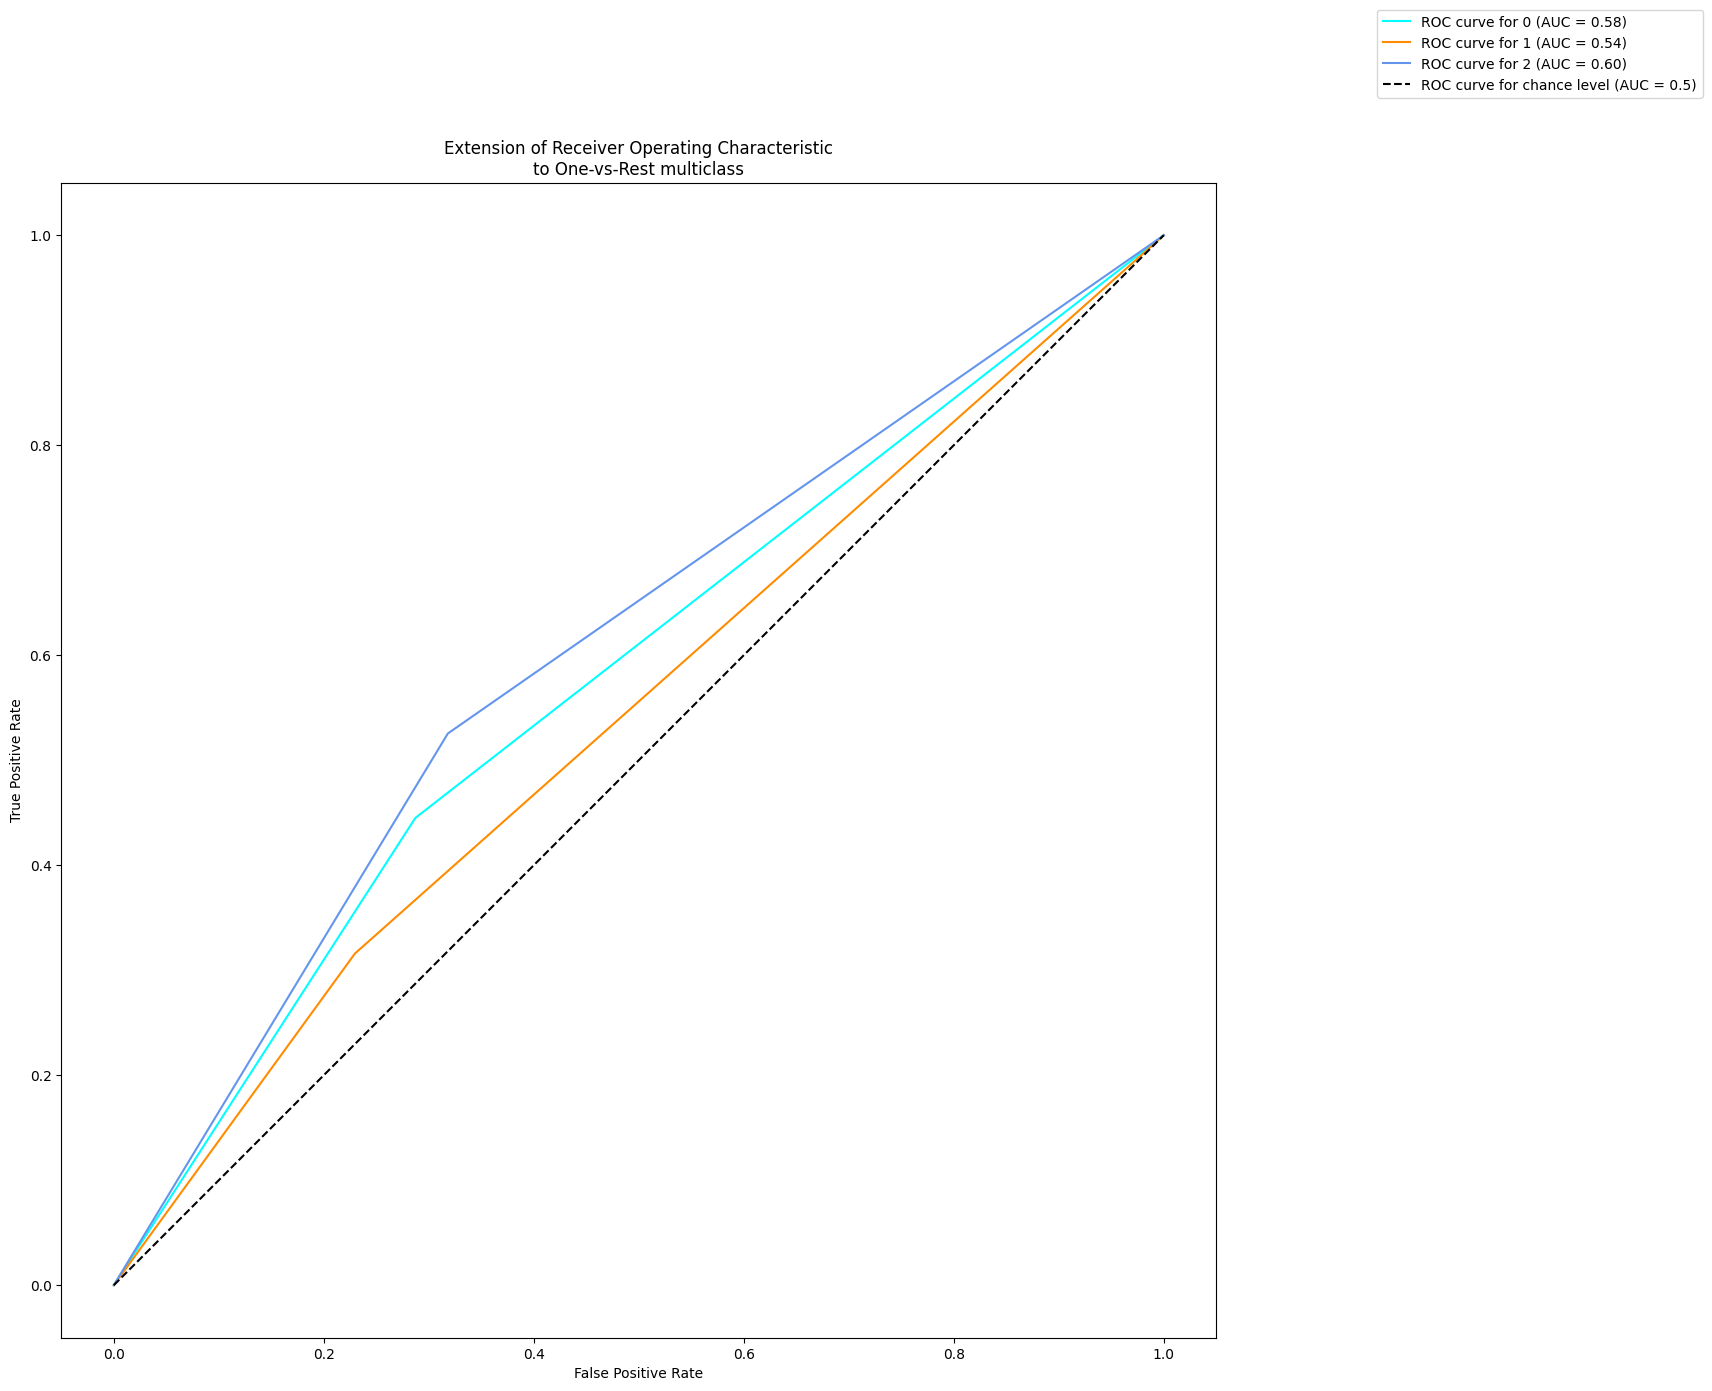

              precision    recall  f1-score   support

           0       0.88      0.45      0.59     24911
           1       0.02      0.32      0.04       440
           2       0.25      0.53      0.34      5009

    accuracy                           0.46     30360
   macro avg       0.38      0.43      0.32     30360
weighted avg       0.76      0.46      0.54     30360



(0.45642292490118574,
 0.7598960164034073,
 0.45642292490118574,
 0.5401686210212361,
 {'Acc': {'Acc': 0.5791172595520422,
   'F1': 0.3600711198107291,
   'Auc': 0.5670599354529829,
   'Epoch': 25,
   'Auc_Per_Class': array([0.58351442, 0.51868316, 0.59898224])},
  'Macro-F1': {'Acc': 0.5791172595520422,
   'F1': 0.3600711198107291,
   'Auc': 0.5670599354529829,
   'Epoch': 25,
   'Auc_Per_Class': array([0.58351442, 0.51868316, 0.59898224])},
  'AUC': {'Acc': 0.43656126482213437,
   'F1': 0.3146319672958454,
   'Auc': 0.5772057448937252,
   'Epoch': 3,
   'Auc_Per_Class': array([0.57397619, 0.55757019, 0.60007086])}})

In [10]:
label_columns = 'race_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)